In [319]:
n <- 42
id <- seq(1, 42)
gender <- 1 * (id <= 16) # 1 = male
pose <- (1 * (id <= 8)) + (1 * ((16 < id) & (id <= 29))) # 1 = high

In [320]:
require(plotrix)

plot.1 <- function(testosterone.change) {
    model <- lm(testosterone.change ~ pose*gender)
    print(summary(model))
    plot(testosterone.change ~ pose, col=c("red", "blue")[gender + 1])
    abline(coefficients(model)[1], coefficients(model)[2], col="red")
    abline(coefficients(model)[1] + coefficients(model)[3], coefficients(model)[2] + coefficients(model)[4], col="blue")
}

plot.n <- function(testosterone.change, true.pose, true.pose.gender) {
    trials <- 1:dim(testosterone.change)[2]
    y <- sapply(trials, function(trial) {
        model <- lm(testosterone.change[,trial] ~ pose*gender)
        coefficients(model)["pose"]
    })
    ci <- sapply(trials, function(trial) {
        model <- lm(testosterone.change[,trial] ~ pose*gender)
        confint(model, "pose")
    })
    plotCI(x=trials, y=y, li=ci[1,], ui=ci[2,], ylab="pose")
    abline(mean(y), 0, col="black")
    abline(true.pose, 0, col="red")
    y <- sapply(trials, function(trial) {
        model <- lm(testosterone.change[,trial] ~ pose*gender)
        coefficients(model)["pose:gender"]
    })
    ci <- sapply(trials, function(trial) {
        model <- lm(testosterone.change[,trial] ~ pose*gender)
        confint(model, "pose:gender")
    })
    plotCI(x=trials, y=y, li=ci[1,], ui=ci[2,], ylab="pose:gender")
    abline(mean(y), 0, col="black")
    abline(true.pose.gender, 0, col="red")
}

plot.both <- function(testosterone.change, true.pose, true.pose.gender) {
#     plot.1(testosterone.change[,1])
    plot.n(testosterone.change, true.pose, true.pose.gender)
}

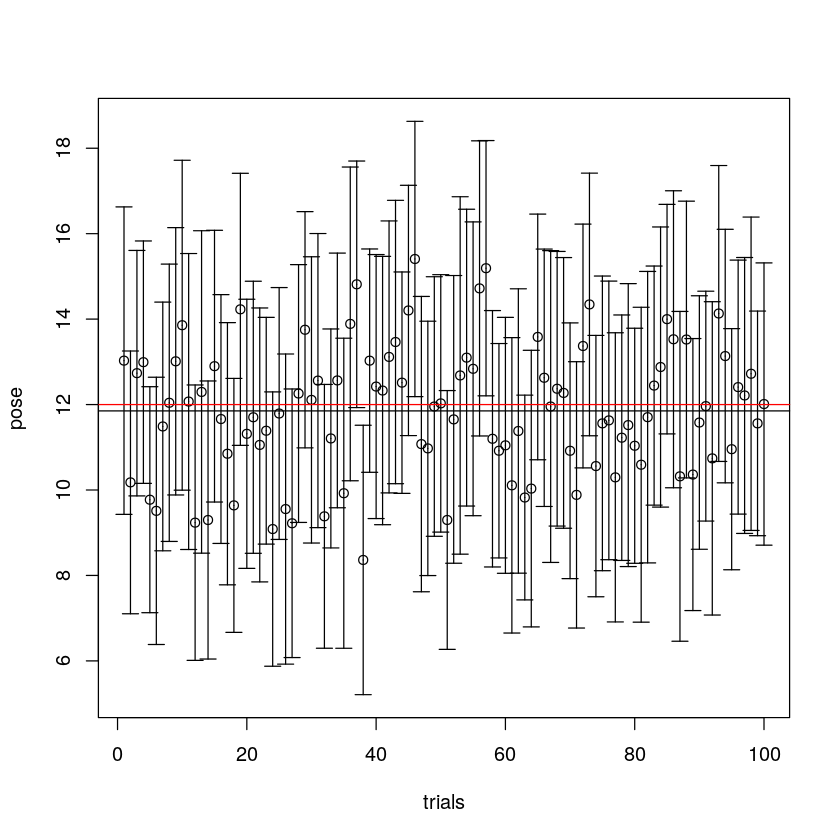

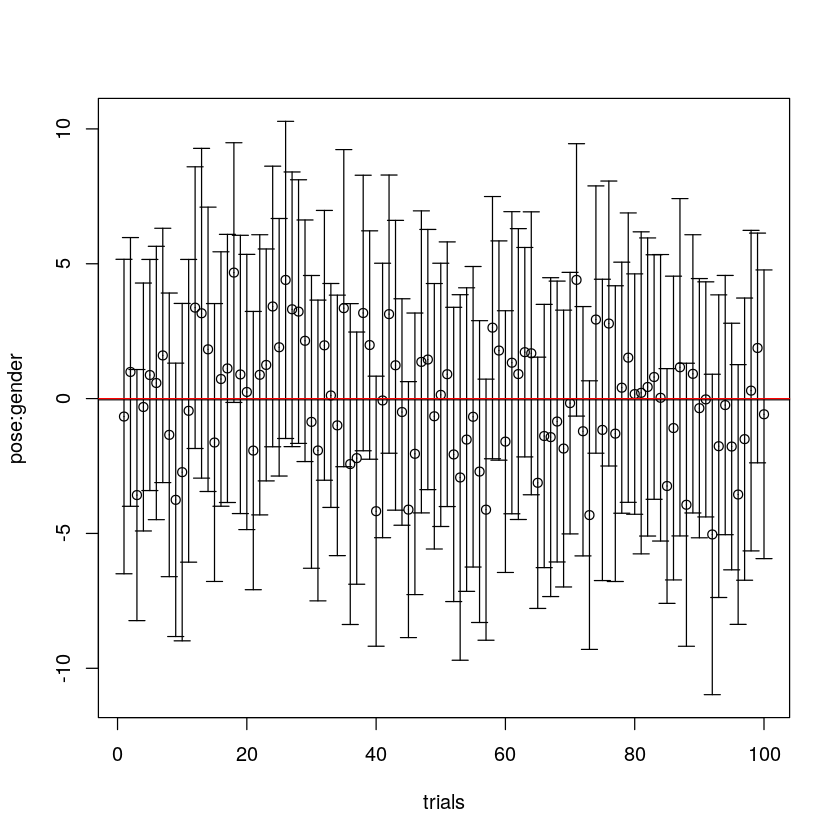

In [321]:
# same change, regardless of gender
plot.both(sapply(1:100, function(trial) { 
    -4 + 12*pose + rnorm(n,0,4) 
}), 12, 0)

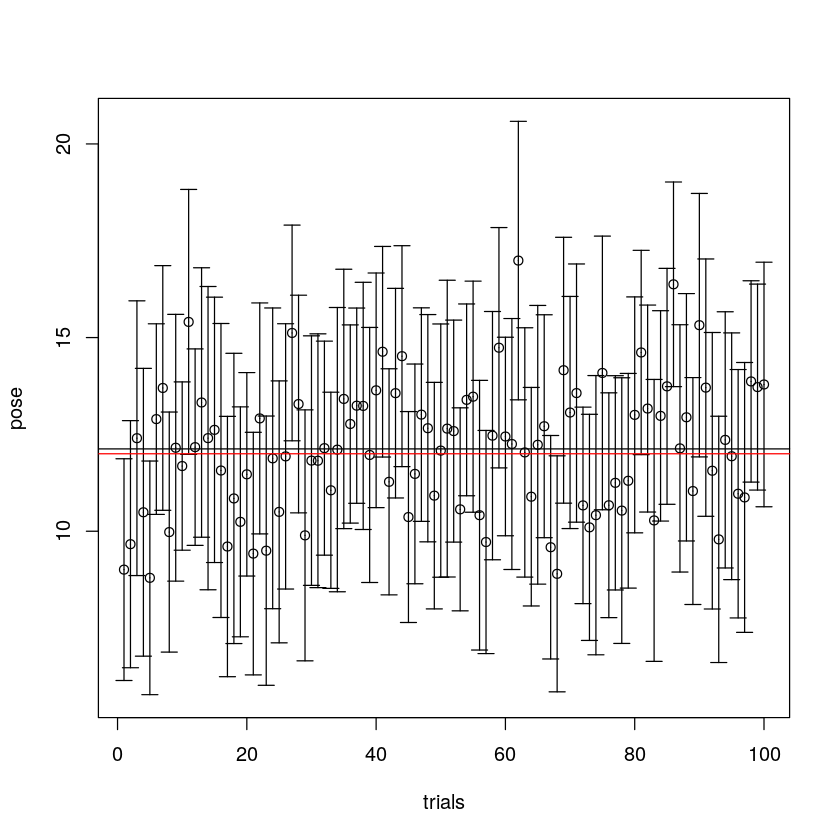

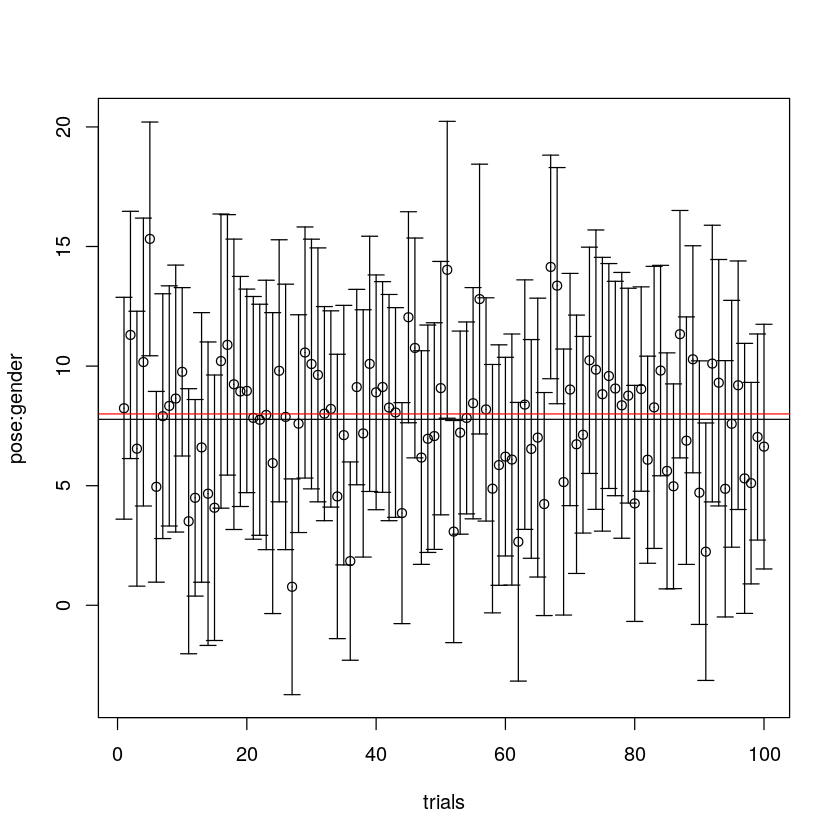

In [322]:
# higher effect for male
plot.both(sapply(1:100, function(trial) { 
    -4 + 12*pose + 8*gender*pose + rnorm(n,0,4) 
}), 12, 8)

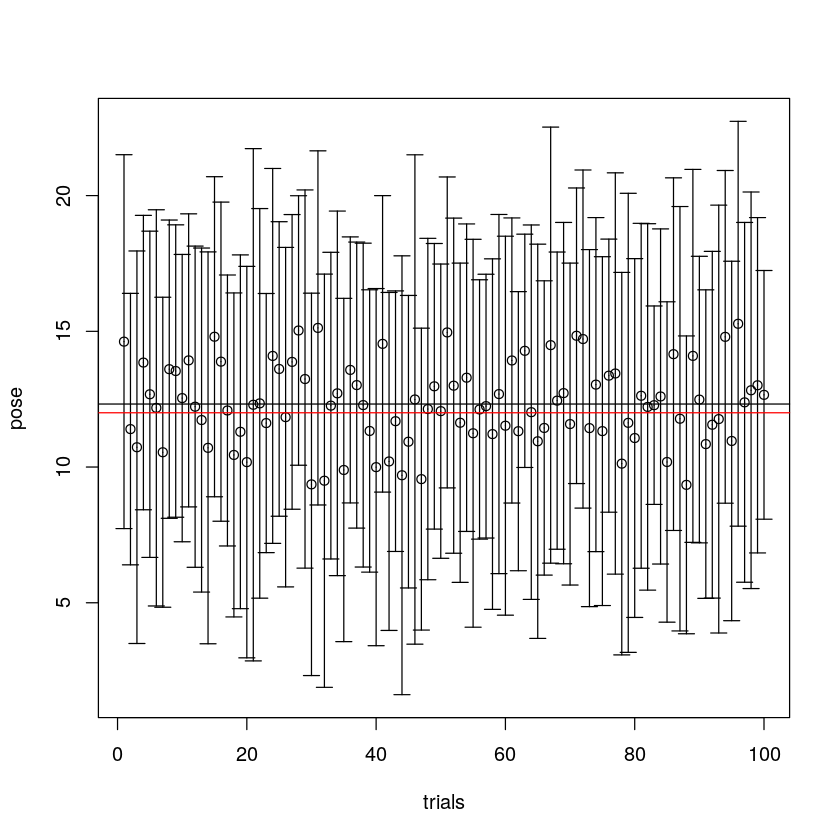

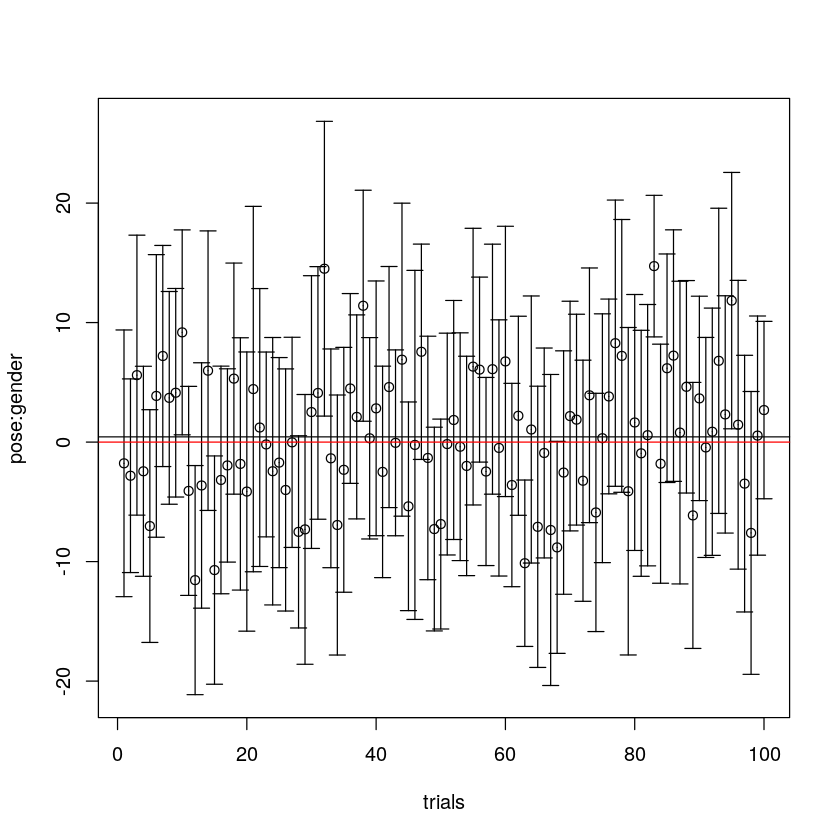

In [323]:
# higher variance for male
plot.both(sapply(1:100, function(trial) { 
    -4 + 12*pose + rnorm(n,0,4+8*gender) 
}), 12, 0)

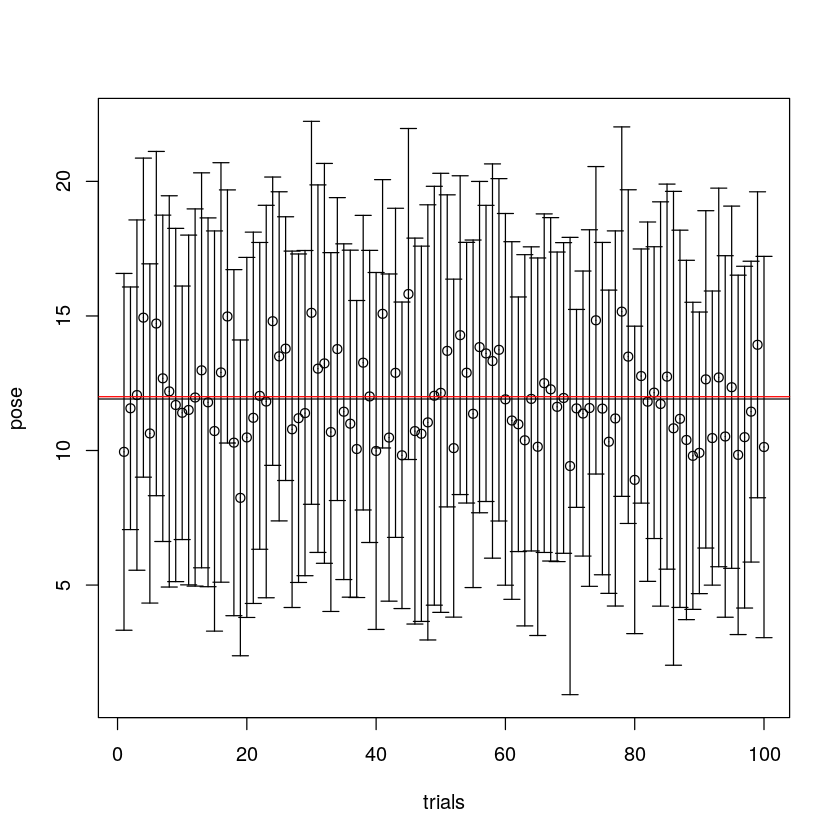

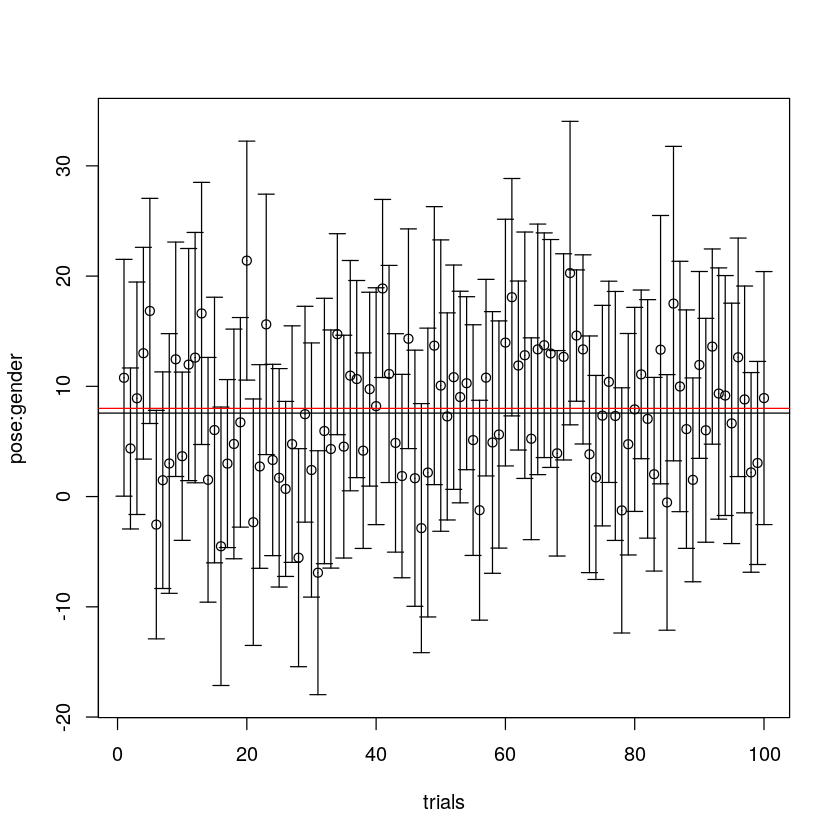

In [324]:
# higher variance and higher mean for male
plot.both(sapply(1:100, function(trial) { 
    -4 + 12*pose + 8*pose*gender + rnorm(n,0,4+8*gender) 
}), 12, 8)